Loading and preparing data...
Dataset shape: (1190, 12)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest_pain_type      1190 non-null   int64  
 3   resting_bp_s         1190 non-null   float64
 4   cholesterol          1190 non-null   float64
 5   fasting_blood_sugar  1190 non-null   int64  
 6   resting_ecg          1190 non-null   int64  
 7   max_heart_rate       1190 non-null   int64  
 8   exercise_angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST_slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 111.7 KB
None

Target distribution:
target
1    629
0    561
Name: count, dtype

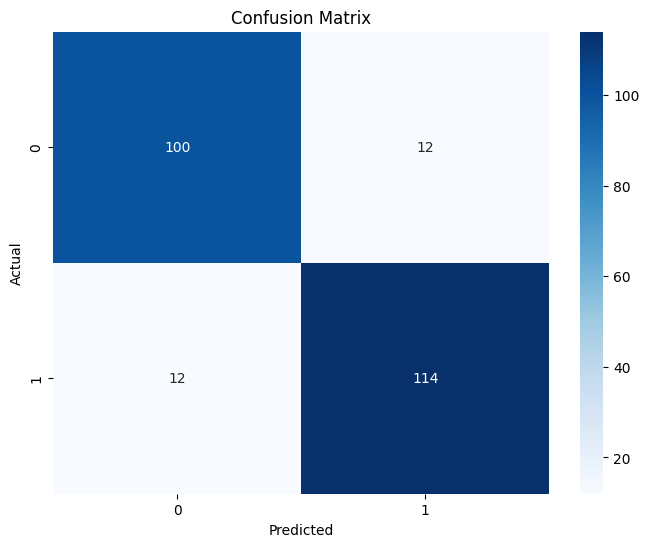


Analyzing features...

Feature Importance:
                feature  importance
10             ST_slope    0.205228
8       exercise_angina    0.203540
2       chest_pain_type    0.160657
1                   sex    0.086838
9               oldpeak    0.076439
7        max_heart_rate    0.061885
5   fasting_blood_sugar    0.050001
0                   age    0.047523
3          resting_bp_s    0.043924
4           cholesterol    0.032513
6           resting_ecg    0.031452


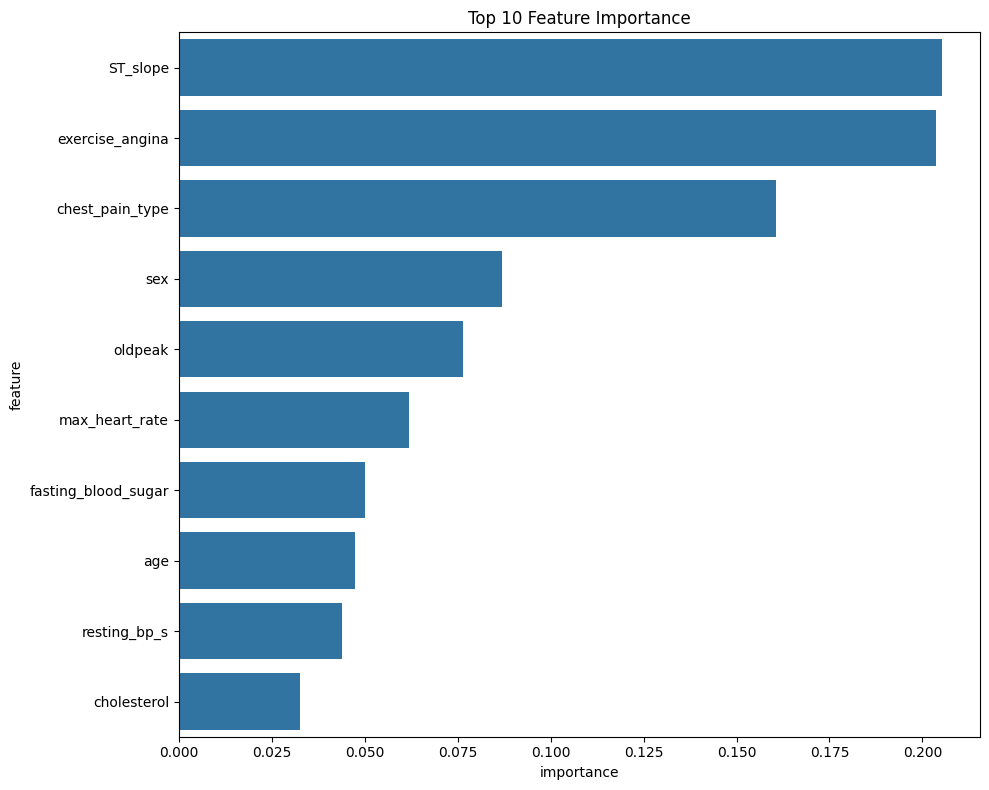


Saving model and scaler...
Model and scaler saved successfully!
Final Model Accuracy: 89.92%


In [2]:
# Heart Attack Prediction Model Training
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare the data
def load_and_prepare_data():
    # Read the CSV file
    df = pd.read_csv(r'Heart_Disease_Dataset.csv')
    
    # Clean column names (remove spaces)
    df.columns = df.columns.str.replace(' ', '_')
    
    # Handle missing values (replace 0 values in certain columns with median)
    columns_to_check = ['cholesterol', 'resting_bp_s']
    for col in columns_to_check:
        if col in df.columns:
            # Replace 0 with NaN, then fill with median
            df[col] = df[col].replace(0, np.nan)
            df[col] = df[col].fillna(df[col].median())
    
    print("Dataset shape:", df.shape)
    print("\nDataset info:")
    print(df.info())
    print("\nTarget distribution:")
    print(df['target'].value_counts())
    
    return df

# Feature engineering and preprocessing
def preprocess_data(df):
    # Separate features and target
    X = df.drop('target', axis=1)
    y = df['target']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test, scaler, X.columns

# Train the ExtraTreesClassifier
def train_model(X_train, y_train):
    # Initialize the ExtraTreesClassifier with optimized parameters
    model = ExtraTreesClassifier(
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    )
    
    # Train the model
    model.fit(X_train, y_train)
    
    return model

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Model Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    return accuracy

# Feature importance analysis
def analyze_features(model, feature_names):
    # Get feature importance
    importance = model.feature_importances_
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    }).sort_values('importance', ascending=False)
    
    print("\nFeature Importance:")
    print(feature_importance)
    
    # Plot feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(data=feature_importance.head(10), y='feature', x='importance')
    plt.title('Top 10 Feature Importance')
    plt.tight_layout()
    plt.show()
    
    return feature_importance

# Main training function
def main():
    print("Loading and preparing data...")
    df = load_and_prepare_data()
    
    print("\nPreprocessing data...")
    X_train, X_test, y_train, y_test, scaler, feature_names = preprocess_data(df)
    
    print("\nTraining ExtraTreesClassifier...")
    model = train_model(X_train, y_train)
    
    print("\nEvaluating model...")
    accuracy = evaluate_model(model, X_test, y_test)
    
    print("\nAnalyzing features...")
    feature_importance = analyze_features(model, feature_names)
    
    # Save the model and scaler
    print("\nSaving model and scaler...")
    joblib.dump(model, 'heart_attack_model.pkl')
    joblib.dump(scaler, 'heart_attack_scaler.pkl')
    joblib.dump(feature_names.tolist(), 'feature_names.pkl')
    
    print("Model and scaler saved successfully!")
    print(f"Final Model Accuracy: {accuracy*100:.2f}%")
    
    return model, scaler, feature_names

if __name__ == "__main__":
    model, scaler, feature_names = main()